# Sección 3: Gapminder

## 3.1 Introducción a Gapminder

### Caso de estudio: Tendencias en la salud y la economía mundiales

**Hans Rosling** era el cofundador de la Fundación **Gapminder**, una organización dedicada a educar al público mediante datos para disipar mitos comunes sobre el llamado mundo en desarrollo. La organización utiliza datos para mostrar cómo las tendencias actuales en los campos de salud y economía contradicen las narrativas que emanan de la cobertura sensacionalista de los medios de catástrofes, tragedias y otros eventos desafortunados.

Como se indica en el sitio web de la Fundación Gapminder:

> Los periodistas y cabilderos cuentan historias dramáticas. Ese es su trabajo. Cuentan historias sobre eventos extraordinarios y personas inusuales. Las historias dramáticas se acumulan en las mentes de las personas en una visión del mundo demasiado dramática y con fuertes sentimientos de estrés negativo: “¡El mundo está empeorando!”, “¡Somos nosotros contra ellos!”, “¡Las demás personas son extrañas!”, “¡La población sigue creciendo!” y “¡A nadie le importa!”

Esta sección se basa en dos charlas que ejemplifican esta perspectiva educativa: *New Insights on Poverty* y *The Best Stats You’ve Ever Seen*. Específicamente, en esta sección usaremos datos para intentar responder a las siguientes dos preguntas:

1. ¿Es una caracterización justa del mundo actual decir que está dividido en naciones ricas occidentales y el mundo en desarrollo compuesto por África, Asia y América Latina?

1. ¿Ha empeorado la desigualdad de ingresos en todos los países durante los últimos 40 años?

> Para responder a estas preguntas, utilizaremos el set de datos `gapminder` proveído por `dslabs`.

### Gapminder Dataset

Comenzamos examinando nuestros conocimientos sobre las diferencias en la mortalidad infantil en diferentes países, ¿Qué países creen que tuvieron las tasas de mortalidad infantil más altas en 2015?.

Al responder a estas preguntas sin datos, los países no europeos suelen ser elegidos como los que tienen tasas de mortalidad infantil más altas. También es común suponer que los países considerados como parte del mundo en desarrollo  tienen tasas de mortalidad igualmente altas.

Para responder a estas preguntas con datos, podemos usar `dplyr`. Por ejemplo, para la comparación entre Sri Lanka o Turquía vemos que:

In [33]:
# Cargamos y seleccionamos gapminder
library(dplyr)
library(dslabs)
data(gapminder)

# Comparamos la mortalidad infantil de Sri Lanka y Turkey
gapminder %>%
    filter(year == 2015 & country %in% c("Sri Lanka", "Turkey")) %>%
    select(country, infant_mortality)


country,infant_mortality
<fct>,<dbl>
Sri Lanka,8.4
Turkey,11.6


> Turquía tiene la mayor tasa de mortalidad infantil

Podemos analizar mas países y ver que los países europeos en esta lista tienen tasas de mortalidad infantil más altas: Polonia tiene una tasa más alta que Corea del Sur y Rusia tiene una tasa más alta que Malasia. También vemos que Pakistán tiene una tasa mucho más alta que Vietnam y Sudáfrica tiene una tasa mucho más alta que Tailandia. 

Resulta que cuando Hans Rosling le dio este cuestionario a grupos de personas educadas, la puntuación promedio fue menos de 2.5 de 5, peor de lo que hubieran obtenido si hubieran adivinado. Esto implica que más que ignorantes, estamos mal informados.

### Esperanza de vida y tasas de fertilidad

Para analizar esta visión del mundo, nuestro primer gráfico es un diagrama de dispersión de la esperanza de vida versus las tasas de fertilidad (número promedio de hijos por mujer).

Comenzamos mirando los datos de hace unos 50 años.

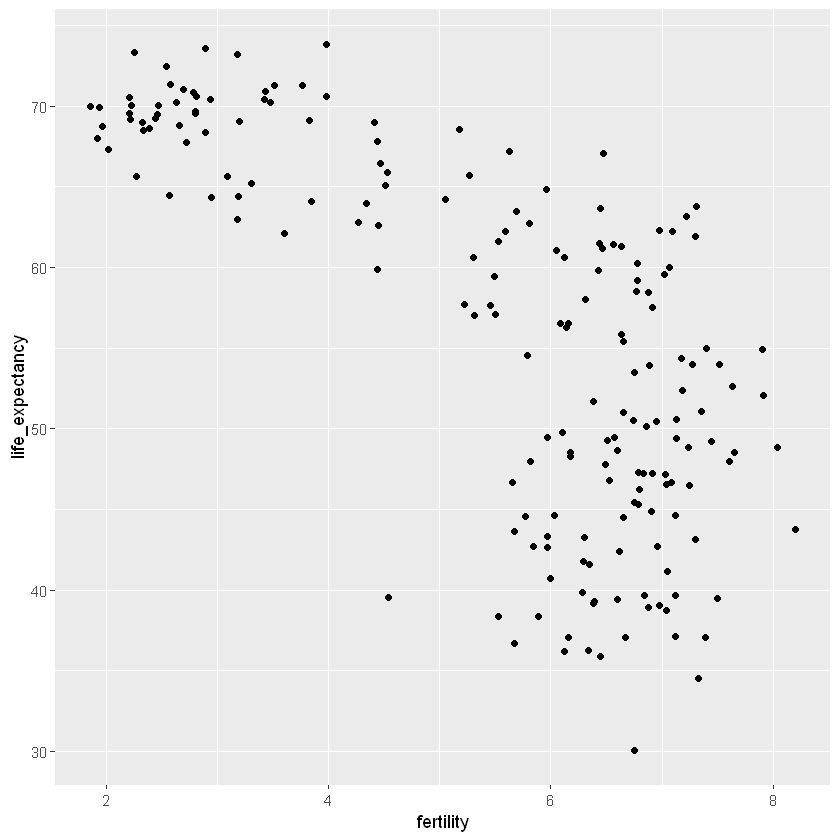

In [34]:
library(ggplot2)
library(dplyr)
library(dslabs)
data(gapminder)

filter(gapminder, year == 1962) %>% ggplot(aes(fertility, life_expectancy)) +
    geom_point()


La mayoría de puntos se dividen en dos categorías distintas:

1. Esperanza de vida alrededor de 70 años y 3 o menos hijos por familia.
2. Esperanza de vida inferior a 65 años y más de 5 niños por familia.

Para confirmar que estos países son de las regiones que esperamos, podemos usar un color para representar un continente.

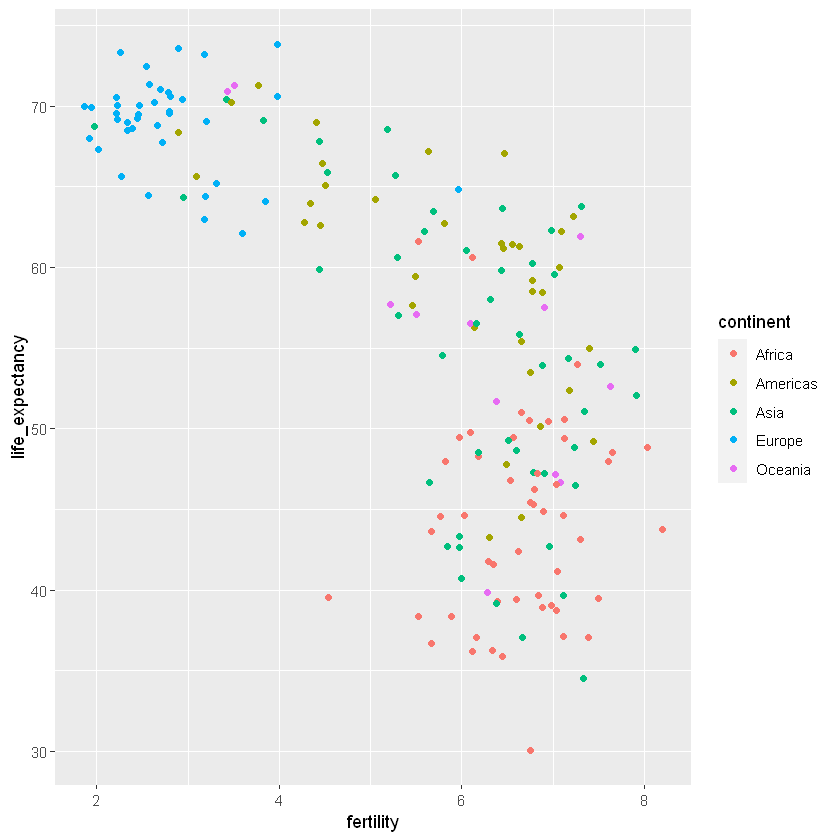

In [35]:
filter(gapminder, year == 1962) %>%
    ggplot(aes(fertility, life_expectancy, color = continent)) +
    geom_point()


## 3.2 Usando el Dataset Gapminder

### Separar por facetas

Podemos gráficar fácilmente los datos de 2012 de la misma manera que lo hicimos para 1962. Sin embargo, para hacer comparaciones, es preferible gráficar lado a lado. En `ggplot2`, logramos esto separando las variables en facetas (faceting en inglés): estratificamos los datos por alguna variable y hacemos el mismo gráfico para cada estrato.
Para separar en facetas, añadimos una capa con la función `facet_grid`

- La función `facet_grid()` permite separar hasta dos variables, con filas separadas por una variable y columnas separadas por la otra variable.

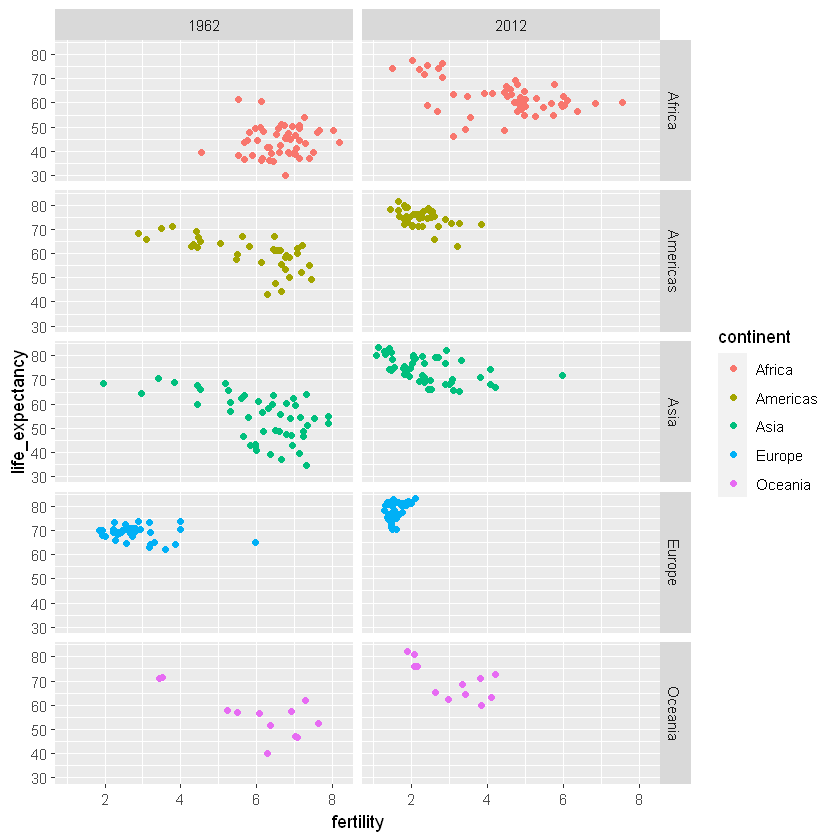

In [36]:
# facet por continente y año

filter(gapminder, year %in% c(1962, 2012)) %>%
    ggplot(aes(fertility, life_expectancy, col = continent)) +
    geom_point() +
    facet_grid(continent ~ year)


- Para facetar por una sola variable, usamos el operador de punto como la otra variable.

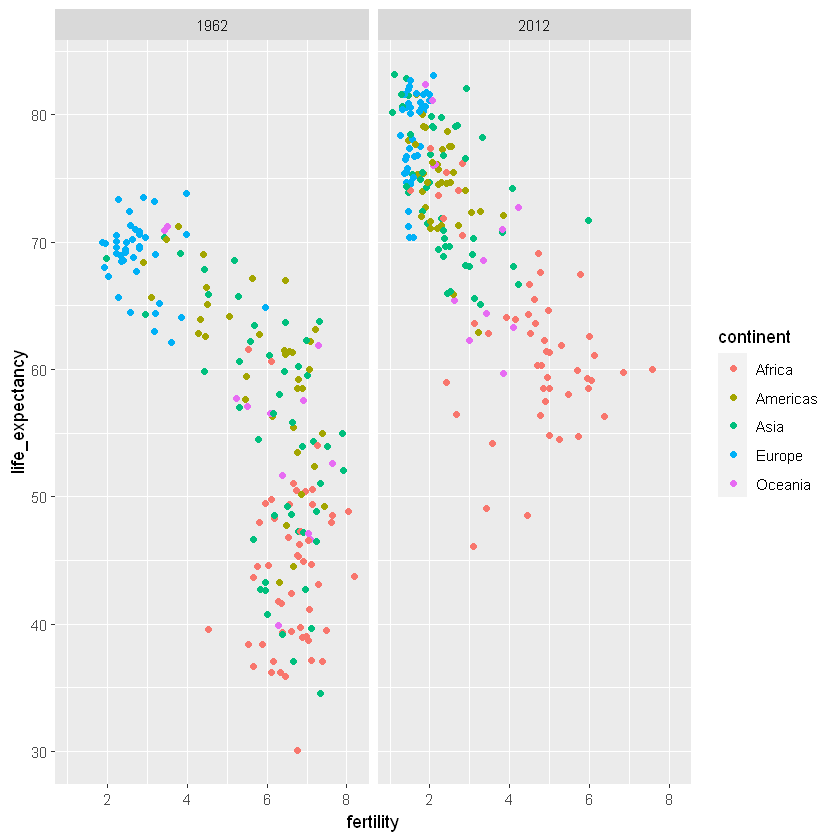

In [37]:
# facet solo por año
filter(gapminder, year %in% c(1962, 2012)) %>%
    ggplot(aes(fertility, life_expectancy, col = continent)) +
    geom_point() +
    facet_grid(. ~ year)


- La función `facet_wrap()` faceta por una variable y envuelve automáticamente la serie de gráficos para que tengan dimensiones legibles.

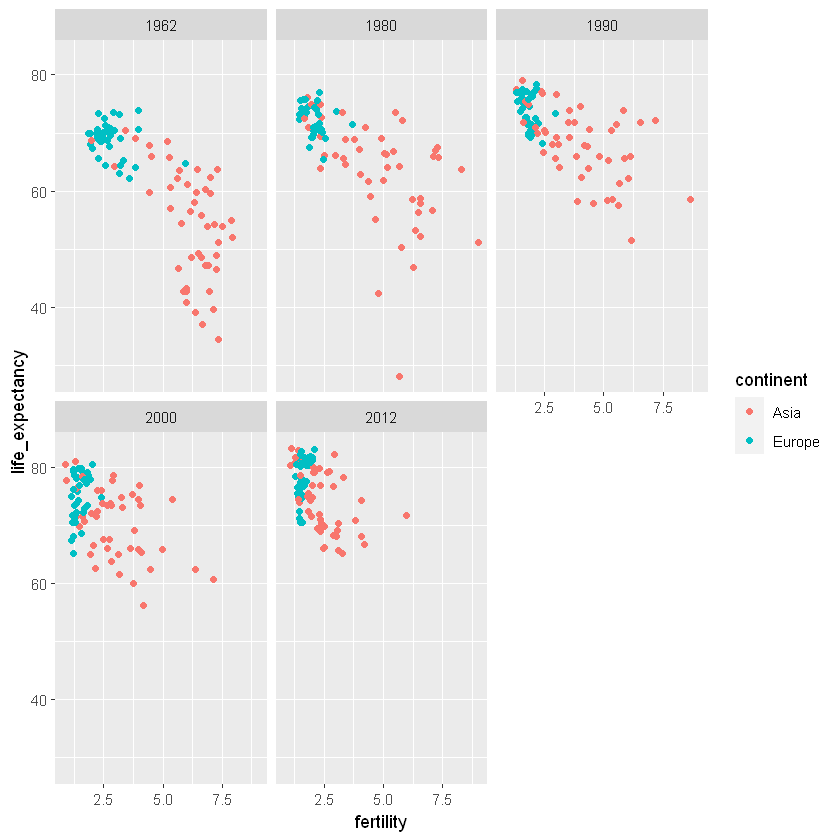

In [38]:
# facet por año, gráficos agrupados en múltiples filas
years <- c(1962, 1980, 1990, 2000, 2012)
continents <- c("Europe", "Asia")
gapminder %>%
    filter(year %in% years & continent %in% continents) %>%
    ggplot(aes(fertility, life_expectancy, col = continent)) +
    geom_point() +
    facet_wrap(~year)


> Este gráfico muestra claramente cómo la mayoría de los países asiáticos han mejorado a un ritmo mucho más rápido que los europeos.

> La creación de facetas mantiene los ejes fijos en todos los gráficos, lo que facilita las comparaciones entre gráficos.

### Gráficos de series de tiempo

Las visualizaciones anteriores ilustran efectivamente que los datos ya no son compatibles con la visión del mundo occidental frente al mundo en desarrollo. Al ver estos gráficos, surgen nuevas preguntas. Por ejemplo, ¿Qué países están mejorando más y cuáles menos? ¿La mejora fue constante durante los últimos 50 años o se aceleró más durante ciertos períodos? 

Para una mirada más detenida que pueda ayudar a responder a estas preguntas, presentamos gráficos de series de tiempo (time series plots en inglés).

Los gráficos de series de tiempo tienen tiempo en el eje-x y un resultado o medida de interés en el eje-y. Por ejemplo, aquí vemos un gráfico de la tendencia de las tasas de fertilidad de Estados Unidos:

Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."


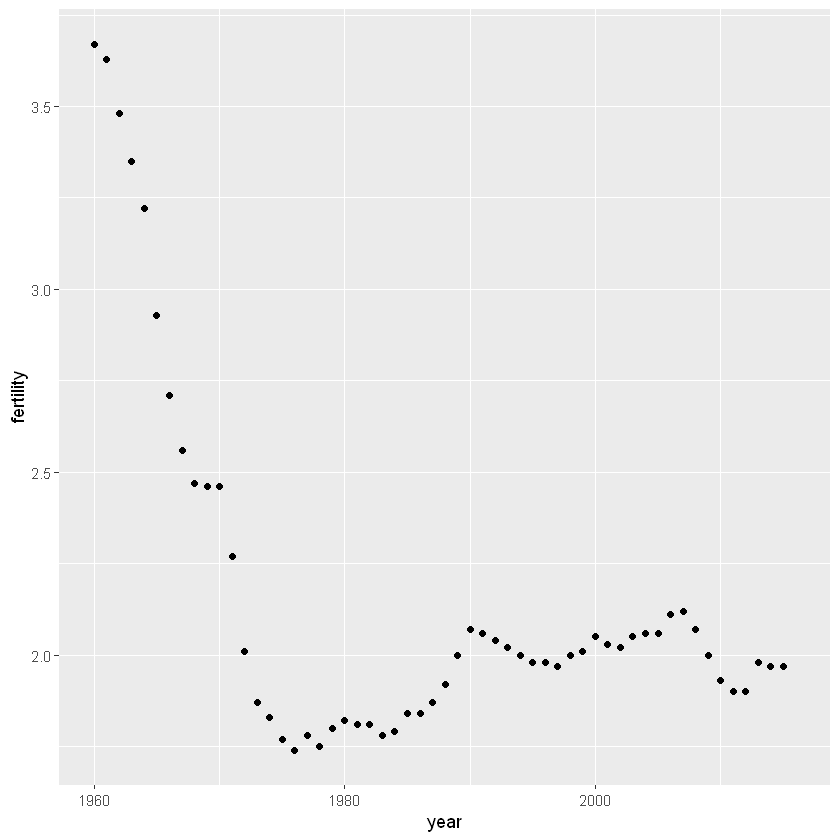

In [39]:
gapminder %>%
    filter(country == "United States") %>%
    ggplot(aes(year, fertility)) +
    geom_point()


Cuando los puntos están regular y densamente espaciados, como vemos arriba, creamos una curva que une los puntos con líneas, para transmitir que estos datos provienen de una sola serie, aquí un país. 

Para hacer esto, usamos la función `geom_line` en vez de `geom_point`.

Warning message:
"Removed 1 row containing missing values (`geom_line()`)."


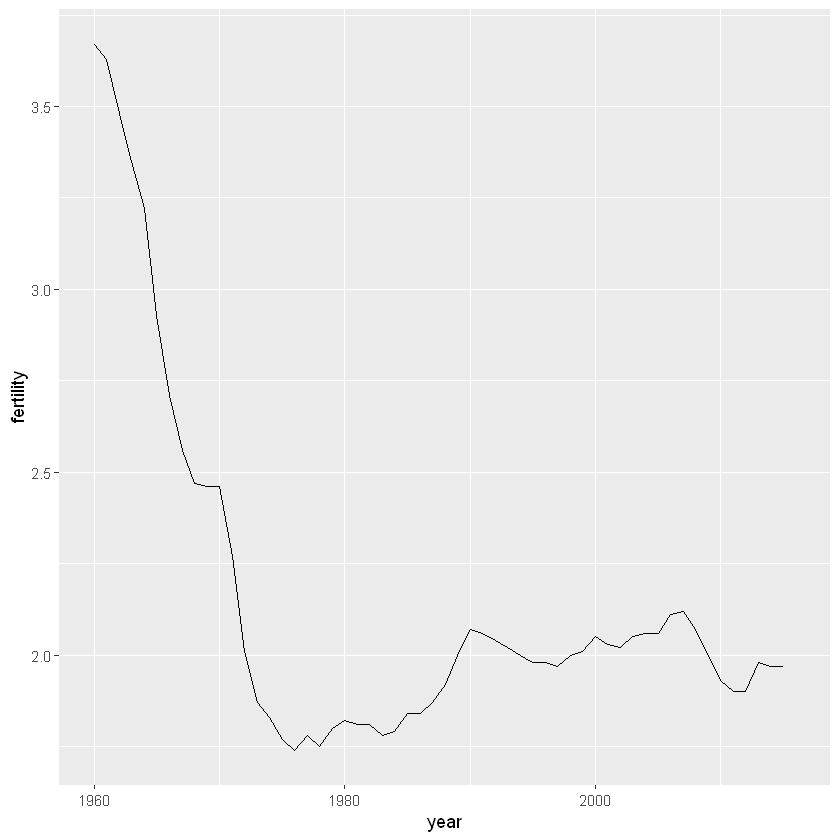

In [40]:
gapminder %>%
    filter(country == "United States") %>%
    ggplot(aes(year, fertility)) +
    geom_line()


Podemos de esta forma trazar varias líneas en el mismo gráfico. Recordando agrupar o colorear por una variable para que las líneas se tracen de forma independiente.

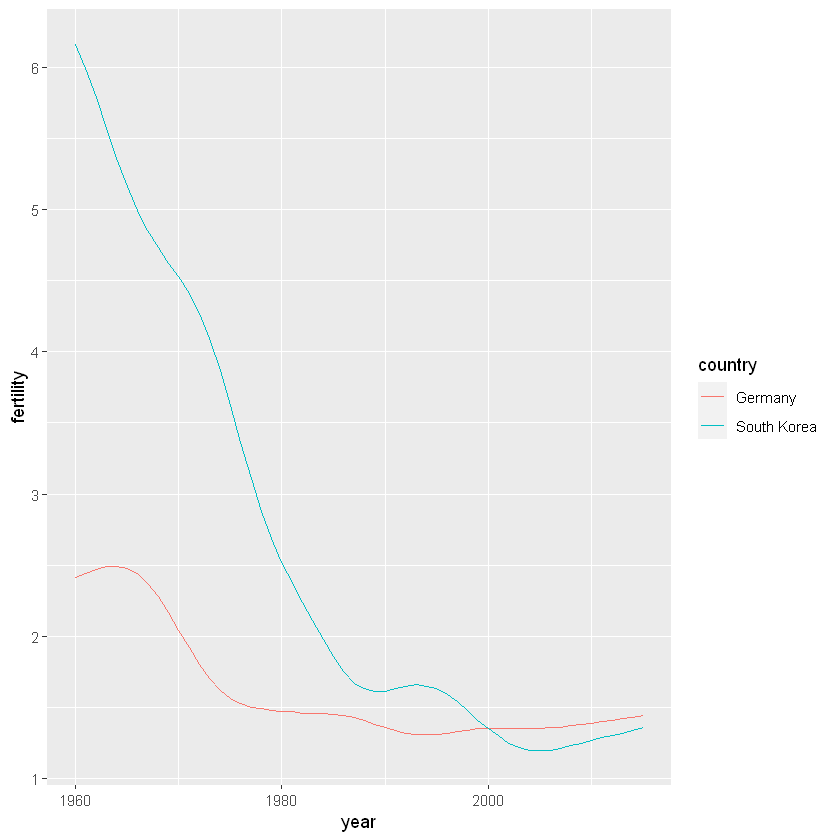

In [41]:
countries <- c("South Korea", "Germany")

gapminder %>%
    filter(country %in% countries & !is.na(fertility)) %>%
    ggplot(aes(year, fertility, col = country)) +
    geom_line()


Para los gráficos de tendencias, recomendamos etiquetar las líneas en lugar de usar leyendas, ya que el espectador puede ver rápidamente qué línea representa qué país. 

Esta sugerencia aplica a la mayoría de los gráficos: las etiquetas generalmente se prefieren a las leyendas.

Aquí un ejemplo con la esperanza de vida, de como hacerlo.

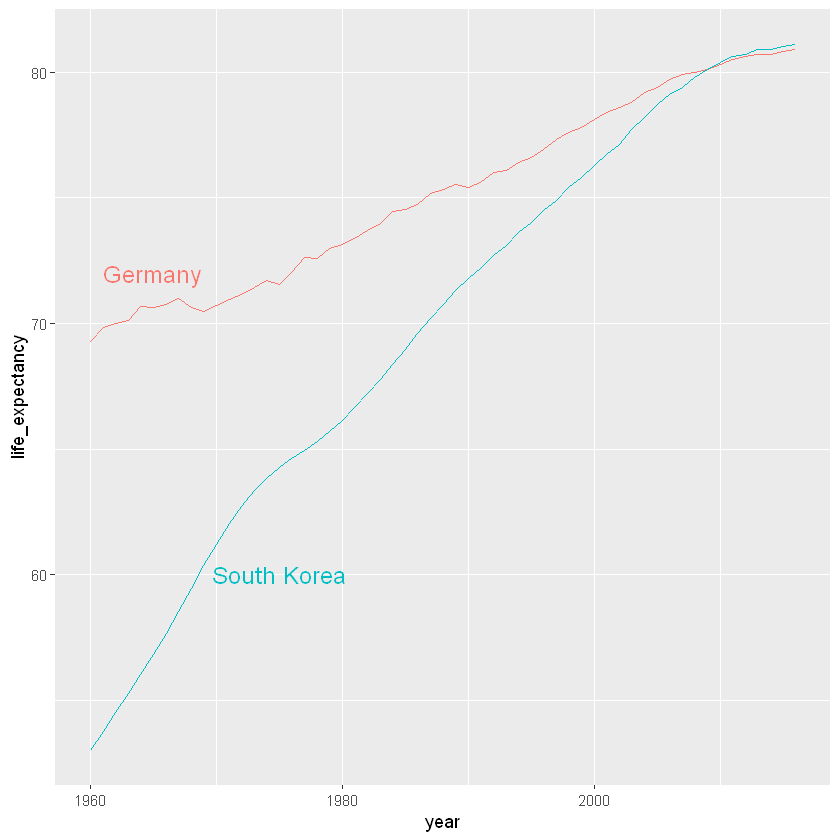

In [42]:
# Definimos una tabla con la ubicación de las etiquetas
labels <- data.frame(country = countries, x = c(1975, 1965), y = c(60, 72))

# Creamos el gráfico
gapminder %>% filter(country %in% countries) %>% # filtramos los datos por el país
    ggplot(aes(year, life_expectancy, col = country)) + # Asignamos los datos a la gráfica
    geom_line() + # creamos la capa de línea
    geom_text(data = labels, aes(x, y, label = country), size = 5) + # Asignamos las etiquetas a la gráfica
    theme(legend.position = "none") # eliminamos la leyenda


### Transformaciones

Cuando se le pregunta al público en general si los países pobres se han vuelto más pobres y los países ricos se han vuelto más ricos, la mayoría responde que sí. 

Mediante el uso de estratificación, histogramas, densidades suaves y diagramas de caja, podremos ver si este realmente es el caso.

La tabla de datos `gapminder` incluye una columna con el producto interno bruto de los países (GDP por sus siglas en inglés). El GDP mide el valor de mercado de los bienes y servicios producidos por un país en un año.

El GDP por persona a menudo se usa como un resumen aproximado de la riqueza de un país. 

Utilizando los dólares estadounidenses actuales como una unidad, una persona que sobrevive con un ingreso de menos de $2 por día se define como viviendo en la “pobreza absoluta”. Añadimos esta variable a la tabla de datos:

In [43]:
# Agregamos una columna con la media de dólares por dia
# Utilizamos el producto interno para calcular la media de dólares por dia
gapminder <- gapminder %>% mutate(dollars_per_day = gdp / population / 365)


> Estos son promedios de país y dentro de cada país hay mucha variabilidad. Todos los gráficos y las ideas que se describen a continuación se refieren a los promedios de los países y no a los individuos dentro de estos.

Por supuesto, estos son promedios de país y dentro de cada país hay mucha variabilidad. Todos los gráficos y las ideas que se describen a continuación se refieren a los promedios de los países y no a los individuos dentro de estos.

Abajo tenemos un histograma de ingresos diarios desde 1970:

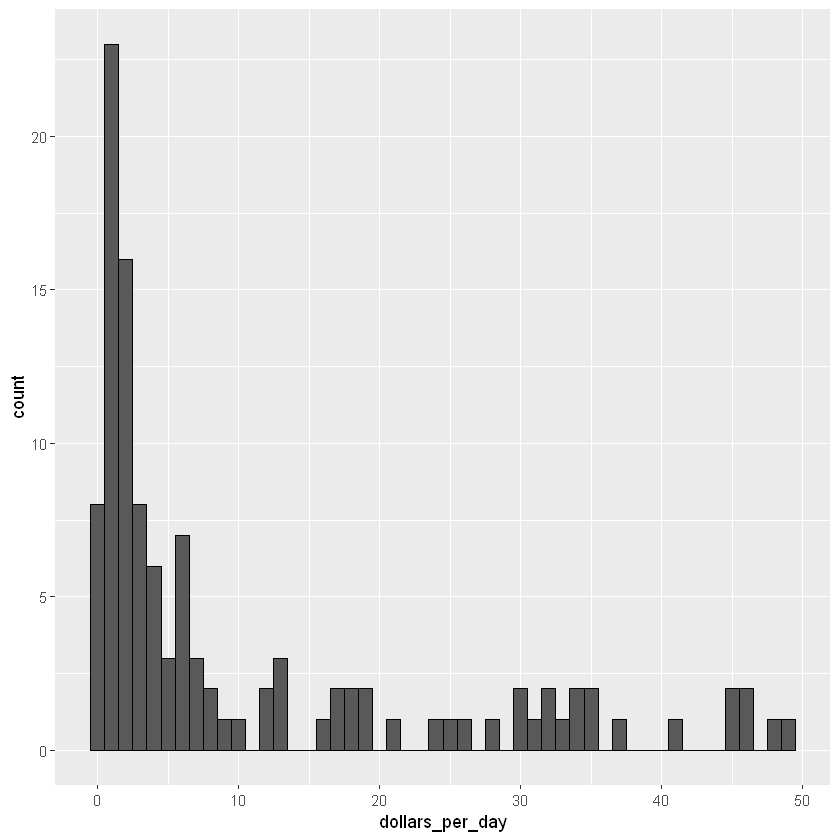

In [44]:
past_year <- 1970
gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    ggplot(aes(dollars_per_day)) +
    geom_histogram(binwidth = 1, color = "black")


En este gráfico  la mayoría del eje-x está dedicado a 35 países con promedio
de menos de $10. Por lo tanto, el gráfico no es muy informativo con respecto a países con valores inferiores a $10 por día.

Sería más informativo poder ver rápidamente cuántos países tienen ingresos diarios promedio de aproximadamente $1 (extremadamente pobre), $2 (muy pobre), $4 (pobre), $8 (promedio), $16 (acomodado), $32 (rico), $64 (muy rico) por día.

Estos cambios son multiplicativos y las transformaciones logarítmicas convierten los cambios multiplicativos en aditivos: cuando se usa la base 2, la duplicación de un valor se convierte en un aumento de 1.
Aquí tenemos la distribución si aplicamos una transformación logarítmica base 2:

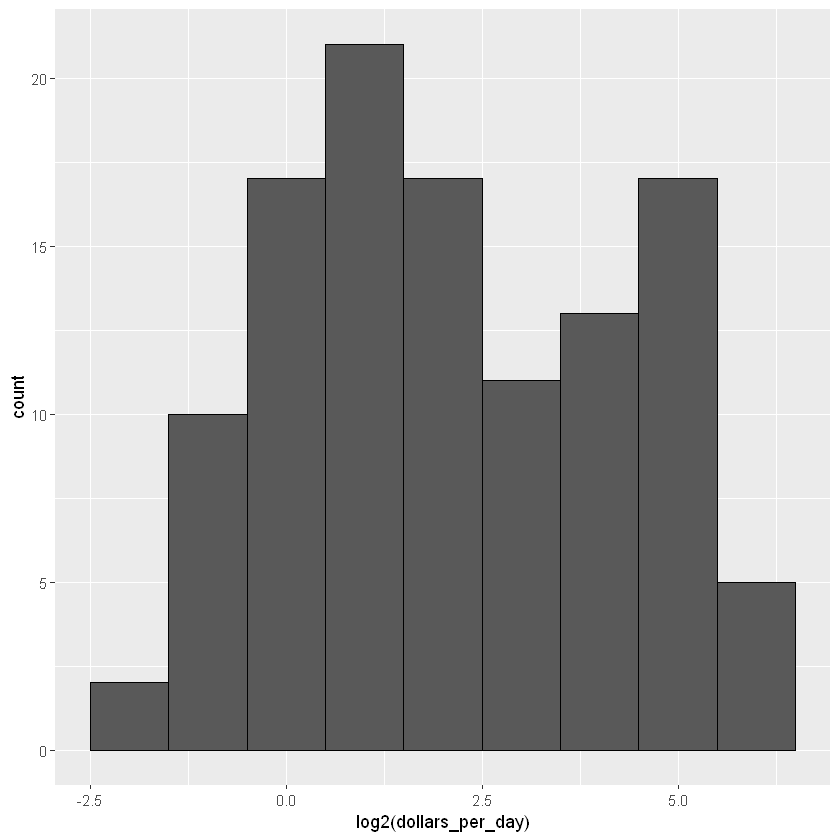

In [45]:
gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    ggplot(aes(log2(dollars_per_day))) +
    geom_histogram(binwidth = 1, color = "black")


Otras opciones comunes son base e (el logaritmo natural) y base 10

> En general no es recomendado utilizar el logaritmo natural para exploración y visualización, dado que $e^n$ es difícil de calcular mentalmente, a diferencia de $2^n \text{ o } 10^n$.
> 

En el ejemplo de dólares por día, utilizamos la base 2 en lugar de la base 10 porque el rango resultante es más fácil de interpretar.

Otra consecuencia de un rango limitado es que elegir el ancho del compartimiento (binwidth en inglés) es más difícil. Con logaritmo base 2, sabemos que un ancho de compartimiento de 1 se convertirá en un compartimiento con rango $x$ a $2x$.

Hay dos formas en que podemos usar las transformaciones logarítmicas en los gráficos.

- Tomar el logaritmo de los valores antes de gráficar.
    - Podemos interpretar más fácilmente los valores intermedios en la escala.
    - La ventaja de usar escalas logarítmicas es que vemos los valores originales en los ejes
- Usar escalas logarítmicas en los ejes
    - la ventaja de mostrar escalas logarítmicas es que los valores originales se muestran en el gráfico y son más fáciles de interpretar.

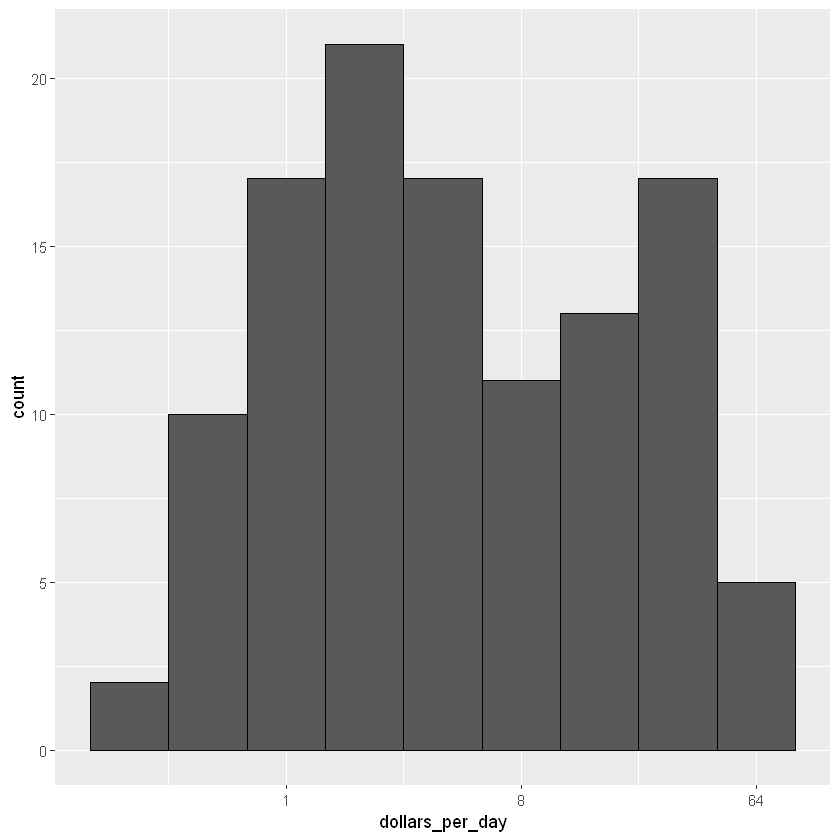

In [46]:
# histograma con escala logarítmica en el eje x
gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    ggplot(aes(dollars_per_day)) +
    geom_histogram(binwidth = 1, color = "black") +
    scale_x_continuous(trans = "log2")


En el histograma anterior vemos dos protuberancias: una aproximadamente en 4 y otra aproximadamente en 32. En estadística, estas protuberancias a veces se denominan modas (modes en inglés). 

La moda de una distribución es el valor con la frecuencia más alta. 

- La moda de distribución normal es el promedio.
- Cuando una distribución, como la anterior, no disminuye monotónicamente de la moda, llamamos a los lugares donde sube y baja de nuevo modas locales y decimos que la distribución tiene modas múltiples.

El histograma anterior sugiere que la distribución de ingreso de los países en 1970 es bimodal. Esta bimodalidad es consistente con un mundo dicotómico compuesto por países con ingresos promedio inferiores a $8 (3 en la escala log 2) por día y países por encima de eso.

### Estratificar y Boxplots

- Podemos crear boxplot estratificados por una variable categórica utilizando la geometría `geom_boxplot()`.
- En los casos en los que tenemos una cantidad significativa de datos puede ser necesario girar las etiquetas para poder leer los nombres, esto lo podemos hacer cambiando el tema a través de `element_text()`.

Veamos esto con nuestros datos

[1] 22

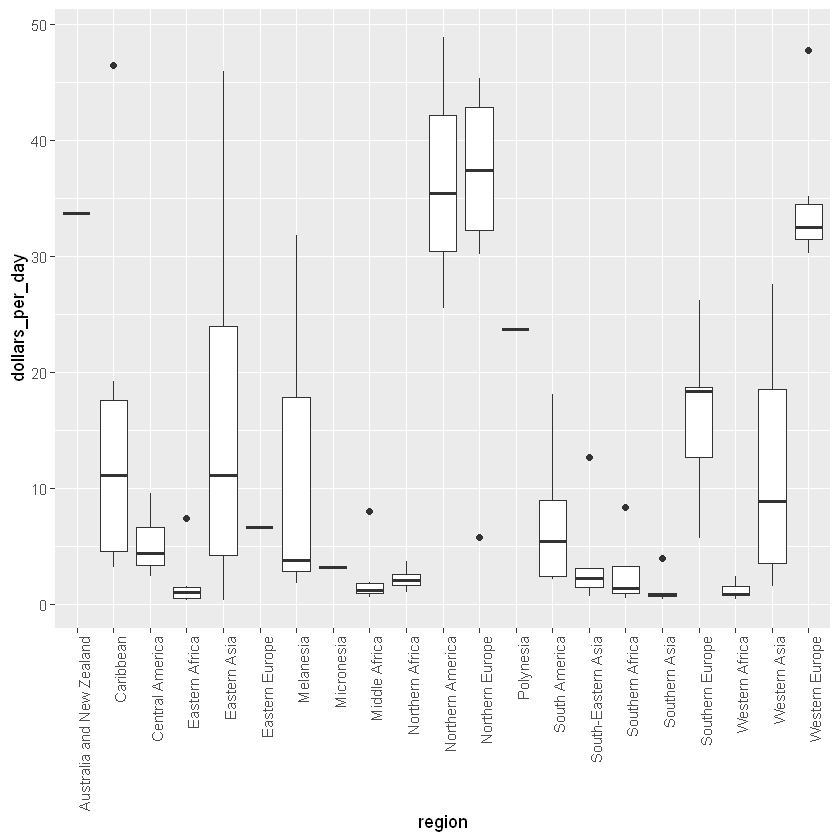

In [47]:
# Cargamos las librerías y los datos
library(tidyverse)
library(dslabs)
data(gapminder)

# Creamos y agregamos la variable dollars_per_day
gapminder <- gapminder %>%
    mutate(dollars_per_day = gdp / population / 365)

# numero de regiones
length(levels(gapminder$region))

# boxplot
past_year <- 1970 # Escogemos el año
p <- gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    ggplot(aes(region, dollars_per_day)) # Creamos el objeto de gráfica con los mapeos globales

# rotamos los nombres en el eje x
p + geom_boxplot() + # creamos la capa del boxplot
    theme(axis.text.x = element_text(angle = 90, hjust = 1))


- Por defecto el ordenamiento se hace por orden alfabético, pero en la mayoría de casos esto no aporta a nuestra visualización, para ello es necesario considerar ordenar los factores por un valor significativo con la función `reorder()`, que cambia el orden de los niveles de los factores en función de un vector numérico relacionado.
- Podemos mostrar los datos agregando puntos de datos al diagrama de caja con una capa `geom_point()`. Esto agrega información más allá del resumen de cinco números al gráfico, pero demasiados puntos de datos pueden ofuscar su mensaje.

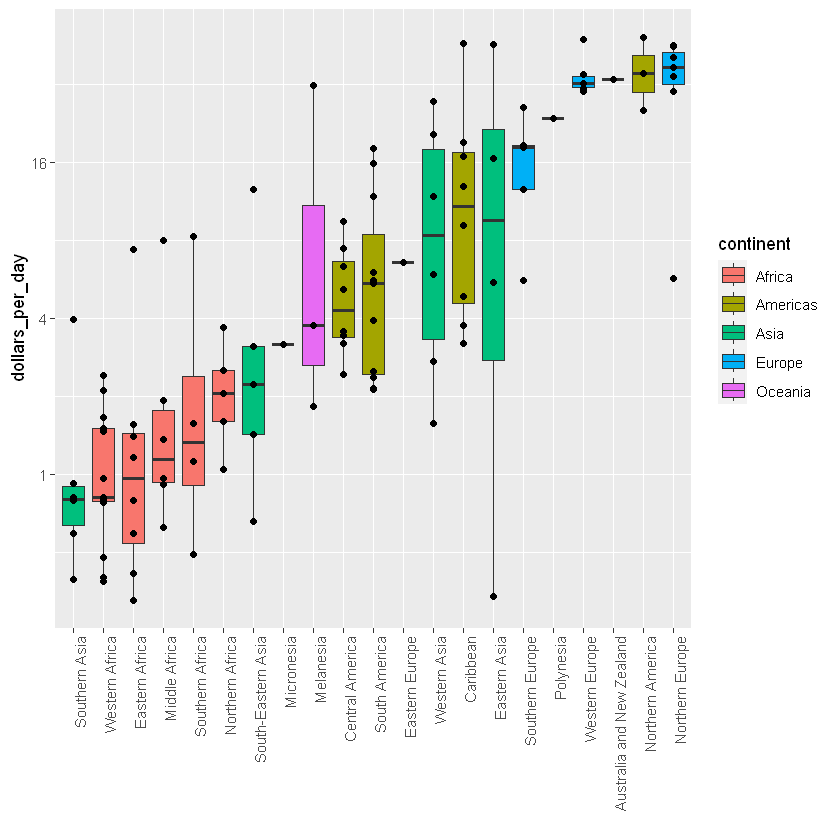

In [48]:
# Reordenando y coloreando
p <- gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>% # seleccionamos el año y hacemos drop de los valores nulos
    mutate(region = reorder(region, dollars_per_day, FUN = median)) %>% # reordenando por ingreso medio
    ggplot(aes(region, dollars_per_day, fill = continent)) + # coloreando por continente
    geom_boxplot() + # agregamos la capa del boxplot
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) + # ajustamos las etiquetas
    xlab("")
# agregamos los data points y cambiamos la escala a log2
p + scale_y_continuous(trans = "log2") + geom_point(show.legend = FALSE)


### Comparando distribuciones

La exploración de datos muestra claramente que en 1970 hubo una dicotomía del “Oeste versus el Resto”. Para saber si esto continua siendo así utilizaremos `face_grid` para ver como han cambiado las distribuciones hasta el 2010, pero antes podría surgir la duda si la cantidad de países reportados en ambos años es la misma.

Podemos verificar esto de la siguiente manera:

In [49]:
# Verificando la cantidad de países reportados por año
sum(!is.na(filter(gapminder, year == 1970)$dollars_per_day)) # número de países en 1970 con datos de GDP
sum(!is.na(filter(gapminder, year == 2010)$dollars_per_day)) # número de países en 2010 con datos de GDP


[1] 113

[1] 176

Para poder hacer una comparación valida necesitamos comparar los mismos países, para ello crearemos una lista con los países que se encuentran reportados en ambos años

In [50]:
# Definimos los años a utilizar
past_year <- 1970
present_year <- 2010

# Creamos una lista con los años a utilizar
years <- c(past_year, present_year)

# Creamos una lista con los países reportados en past_year
country_list_1 <- gapminder %>%
    filter(year == past_year & !is.na(dollars_per_day)) %>%
    .$country
# Creamos una lista con los países reportados en present_year
country_list_2 <- gapminder %>%
    filter(year == present_year & !is.na(dollars_per_day)) %>%
    .$country
# Creamos una lista con los países reportados en ambas listas
country_list <- intersect(country_list_1, country_list_2)


Ahora grafiquemos West vs developing.

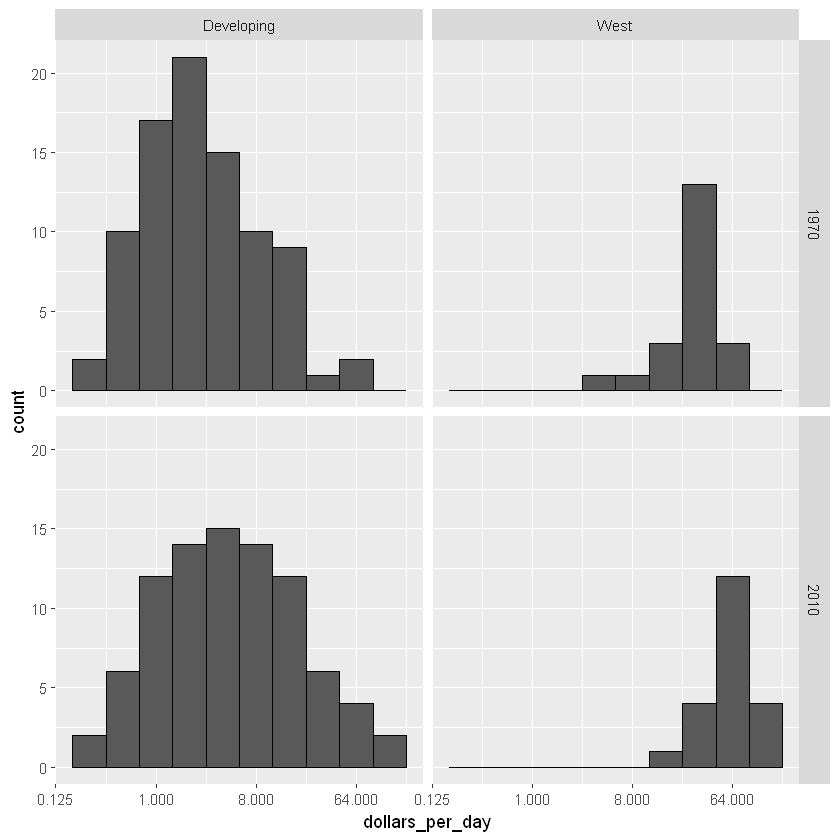

In [51]:
# Definimos los países pertenecientes a west
west <- c("Western Europe", "Northern Europe", "Southern Europe", "Northern America", "Australia and New Zealand")

# Creamos los histogramas solo con los países reportados en ambos años
gapminder %>%
    filter(year %in% c(past_year, present_year) & country %in% country_list) %>% # solo países seleccionados
    mutate(group = ifelse(region %in% west, "West", "Developing")) %>% # Dividimos en west y developing
    ggplot(aes(dollars_per_day)) + # Creamos el objeto ggplot con los mapeos globales
    geom_histogram(binwidth = 1, color = "black") + # añadimos el histograma
    scale_x_continuous(trans = "log2") + # cambiamos la escala de x
    facet_grid(year ~ group)


Ahora vemos que los países ricos se han vuelto un poco más ricos, pero en términos de porcentaje, los países pobres parecen haber mejorado más. En particular, vemos que la proporción de países en desarrollo que ganan más de $16 por día aumentó sustancialmente.

Para ver qué regiones específicas mejoraron más, podemos rehacer los boxplots

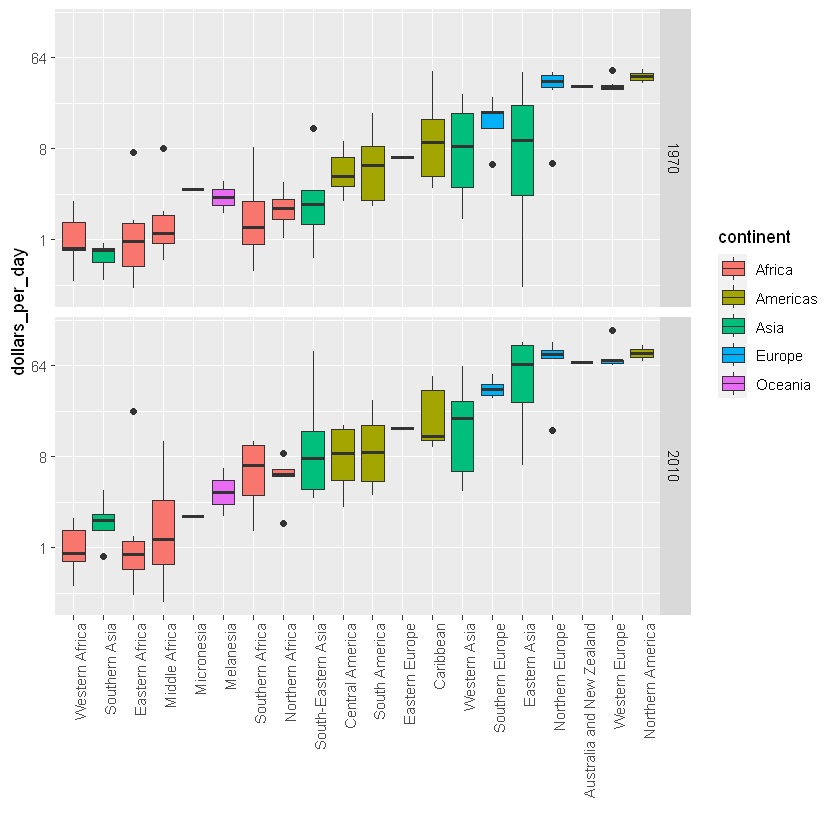

In [52]:
p <- gapminder %>%
    filter(year %in% c(past_year, present_year) & country %in% country_list) %>%
    mutate(region = reorder(region, dollars_per_day, FUN = median)) %>%
    ggplot() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    xlab("") +
    scale_y_continuous(trans = "log2")
# boxplots separados por año
p + geom_boxplot(aes(region, dollars_per_day, fill = continent)) +
    facet_grid(year ~ .)


En algunas ocasiones la representación anterior pude no ser eficaz al momento de comparar el cambio entre los años, por lo cual podemos optar por otro tipo de representación.

En este caso ambos años en el mismo gráfico uno al lado del otro.

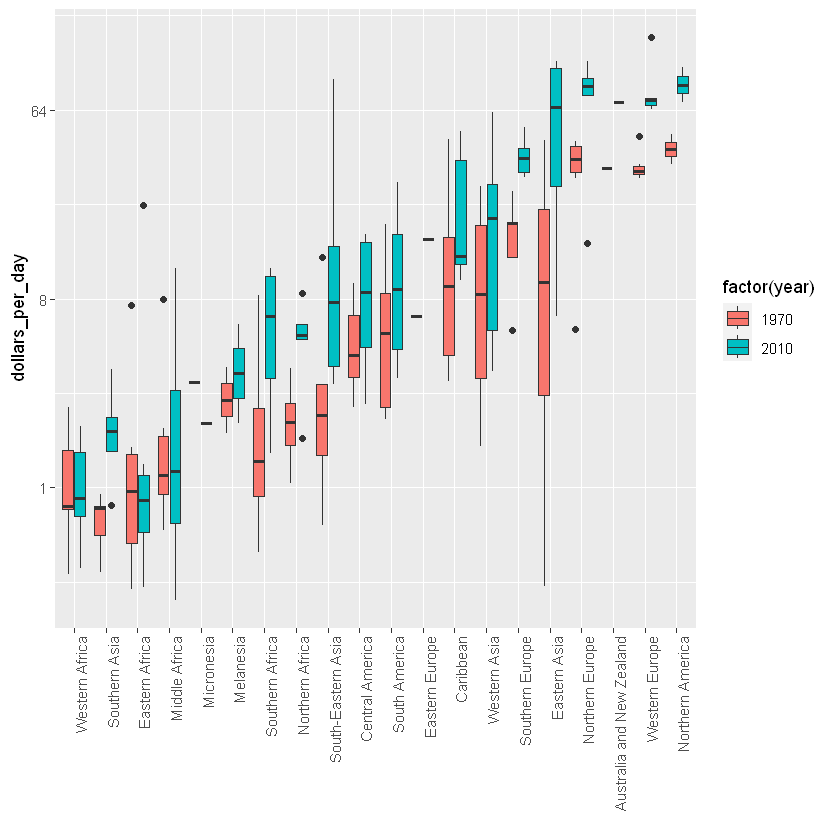

In [53]:
# juntando los gráficos mostrando un año al lado del otro
p + geom_boxplot(aes(region, dollars_per_day, fill = factor(year)))


### Gráficos de densidad

La exploración de datos previa sugiere que la brecha de ingresos entre países ricos y pobres se ha reducido considerablemente durante los últimos 40 años.

Empecemos observando que los gráficos de densidad para la distribución del ingreso en 1970 y 2010 transmiten el mensaje de que la brecha se está cerrando:

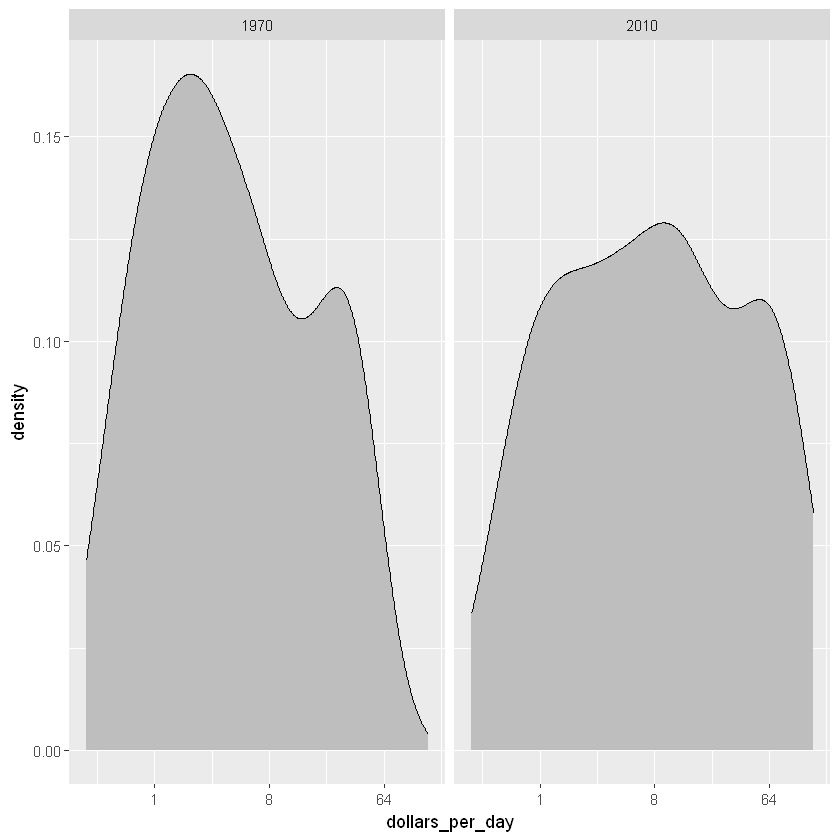

In [54]:
gapminder %>%
    filter(year %in% years & country %in% country_list) %>%
    ggplot(aes(dollars_per_day)) +
    geom_density(fill = "grey") +
    scale_x_continuous(trans = "log2") +
    facet_grid(. ~ year)

En el gráfico de 1970, vemos dos modas claras: países pobres y ricos. En 2010, parece que algunos de los países pobres se han desplazado hacia la derecha, cerrando la brecha.

El próximo mensaje que debemos transmitir es que la razón de este cambio en distribución es que varios países pobres se hicieron más ricos, en lugar de que algunos países ricos se hicieron más pobres. Para hacer esto, podemos asignar un color a los grupos que identificamos durante la exploración de datos.

Pero cuando superponemos dos densidades, el comportamiento por defecto es que el área representada por cada distribución sume a 1, independientemente del tamaño de cada grupo, sin embargo nuestros grupos no contienen el mismo numero:

In [55]:
gapminder %>%
    filter(year == past_year & country %in% country_list) %>%
    mutate(group = ifelse(region %in% west, "West", "Developing")) %>%
    group_by(group) %>%
    summarize(n = n()) %>%
    knitr::kable()



|group      |  n|
|:----------|--:|
|Developing | 87|
|West       | 21|

Para poder implementar el numero de países en cada grupo necesitaremos aprender a acceder a las variables calculadas con la función `geom_density`.

Para que las áreas de estas densidades sean proporcionales al tamaño de los grupos, simplemente multiplicamos los valores del eje-y por el tamaño del grupo.

En el archivo de ayuda de `geom_density`, vemos que las funciones calculan una variable denominada `count` que hace exactamente esto. Queremos que esta variable, y no la densidad, esté en el eje-y.

En ggplot2, obtenemos acceso a estas variables utilizando `after_stat()`. Por lo tanto, utilizaremos el siguiente mapeo:

```r
aes(x = dollars_per_day, y = after_stat(count))
```

Ahora podemos crear el diagrama deseado

> Para que las densidades sean mas suaves es necesario utilizar el parámetro `bw`

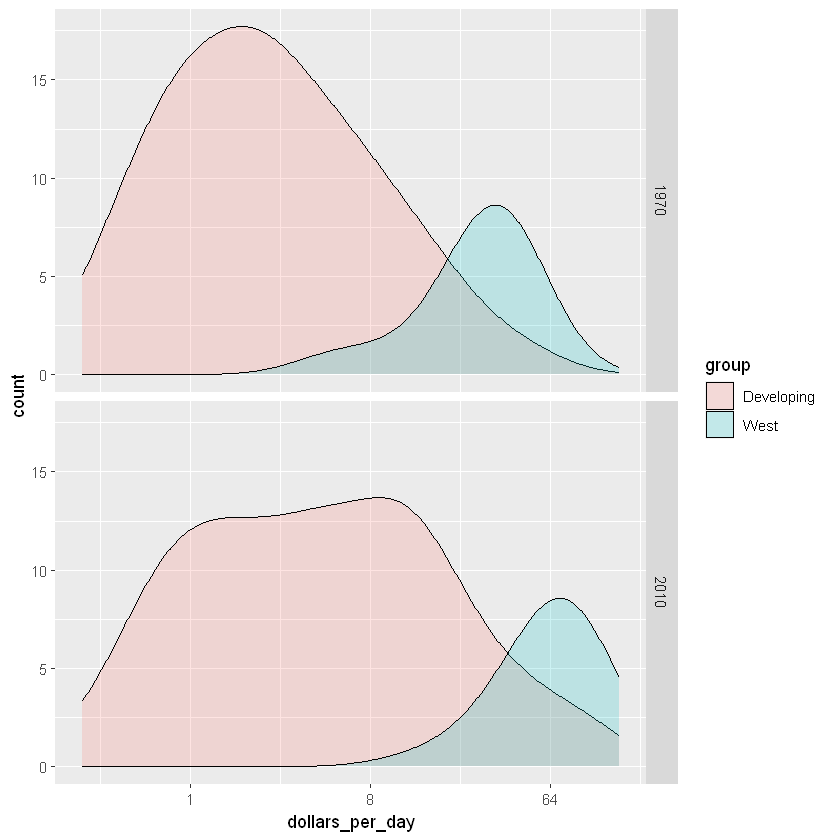

In [62]:
p <- gapminder %>%
    filter(year %in% years & country %in% country_list) %>%
    mutate(group = ifelse(region %in% west, "West", "Developing")) %>%
    ggplot(aes(dollars_per_day, y = after_stat(count), fill = group)) +
    scale_x_continuous(trans = "log2")
p + geom_density(alpha = 0.2, bw = 0.75) + facet_grid(year ~ .)

En este caso nos interesa conocer las regiones exactamente, para poder agrupar utilizamos la función case_when

In [63]:
# agregamos group como factor, agrupando por regiones
gapminder <- gapminder %>%
    mutate(group = case_when(
            .$region %in% west ~ "West",
            .$region %in% c("Eastern Asia", "South-Eastern Asia") ~ "East Asia",
            .$region %in% c("Caribbean", "Central America", "South America") ~ "Latin America",
            .$continent == "Africa" & .$region != "Northern Africa" ~ "Sub-Saharan Africa",
            TRUE ~ "Others"))

# reordenamos los niveles de los factores
gapminder <- gapminder %>%
    mutate(group = factor(group, levels = c("Others", "Latin America", "East Asia", "Sub-Saharan Africa", "West")))

Graficamos las densidades de cada region apiladas entre si.

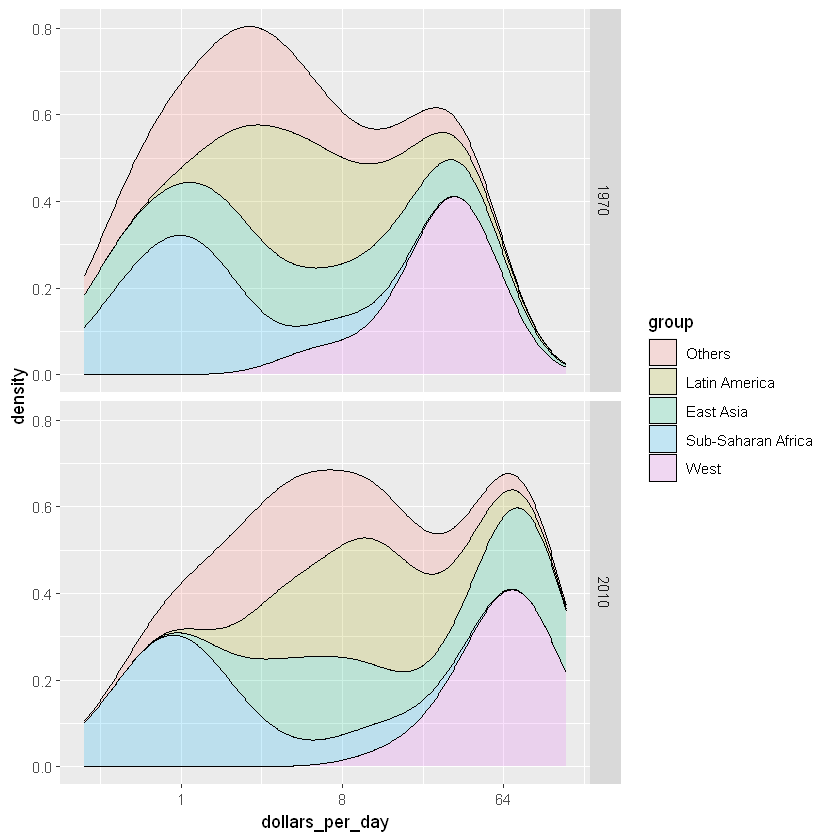

In [64]:
# redefinimos p con nuestros nuevos grupos
p <- gapminder %>%
  filter(year %in% c(past_year, present_year) & country %in% country_list) %>%
    ggplot(aes(dollars_per_day, fill = group)) +
    scale_x_continuous(trans = "log2")

# Agregamos los gráficos de densidad de manera apilada
p + geom_density(alpha = 0.2, bw = 0.75, position = "stack") +
    facet_grid(year ~ .)

Aquí podemos ver claramente cómo las distribuciones para Asia Oriental, América Latina y otros se desplazan notablemente hacia la derecha. Mientras que África subsahariana permanece estancada

Como punto final, notamos que estas distribuciones ponderan cada país igual. Entonces si la mayoría de la población está mejorando, pero viviendo en un país muy grande, como China, podríamos no apreciar esto. De hecho, podemos ponderar las densidades suaves usando el argumento de mapeo `weight`.

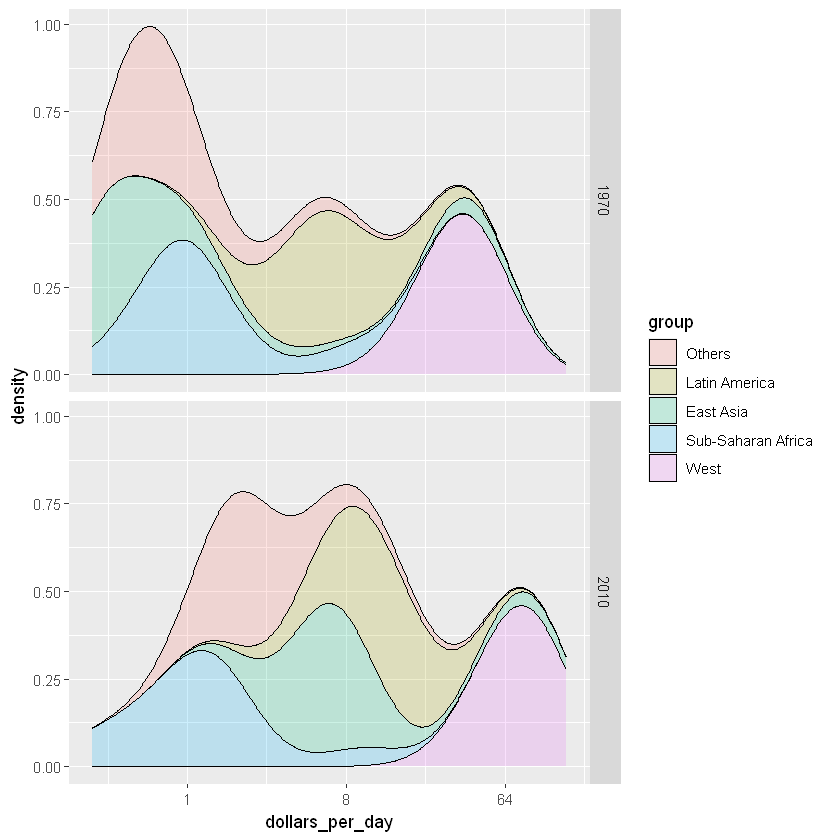

In [66]:
# gráfica de densidad apilada ponderada
gapminder %>%
    filter(year %in% c(past_year, present_year) & country %in% country_list) %>%
    group_by(year) %>%
    mutate(weight = population/sum(population*2)) %>%
    ungroup() %>%
    ggplot(aes(dollars_per_day, fill = group, weight = weight)) +
    scale_x_continuous(trans = "log2") +
    geom_density(alpha = 0.2, bw = 0.75, position = "stack") + facet_grid(year ~ .)

### La falacia ecológica